In [8]:
!pwd

/content


In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [10]:
! pip install -q kaggle

In [11]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
! cp kaggle.json ~/.kaggle/

In [13]:
! chmod 600  ~/.kaggle/kaggle.json

In [14]:
!kaggle datasets download -d imsparsh/flowers-dataset

 98% 201M/205M [00:01<00:00, 150MB/s]
100% 205M/205M [00:01<00:00, 137MB/s]
flowers-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
!unzip flowers-dataset.zip

Archive:  flowers-dataset.zip
  inflating: LICENSE.txt             
  inflating: Testing_set_flower.csv  
  inflating: sample_submission.csv   
  inflating: test/Image_1.jpg        
  inflating: test/Image_10.jpg       
  inflating: test/Image_100.jpg      
  inflating: test/Image_101.jpg      
  inflating: test/Image_102.jpg      
  inflating: test/Image_103.jpg      
  inflating: test/Image_104.jpg      
  inflating: test/Image_105.jpg      
  inflating: test/Image_106.jpg      
  inflating: test/Image_107.jpg      
  inflating: test/Image_108.jpg      
  inflating: test/Image_109.jpg      
  inflating: test/Image_11.jpg       
  inflating: test/Image_110.jpg      
  inflating: test/Image_111.jpg      
  inflating: test/Image_112.jpg      
  inflating: test/Image_113.jpg      
  inflating: test/Image_114.jpg      
  inflating: test/Image_115.jpg      
  inflating: test/Image_116.jpg      
  inflating: test/Image_117.jpg      
  inflating: test/Image_118.jpg      
  inflating: test/Im

In [16]:
import pandas as pd 

from random import randint

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

In [17]:
flowers_path = '/content/train'

In [18]:
classes = os.listdir(flowers_path)
classes

['dandelion', 'daisy', 'tulip', 'sunflower', 'rose']

In [19]:
image_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_path,
    validation_split=0.25,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_path,
    validation_split=0.25,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes
)

Found 2746 files belonging to 5 classes.
Using 2060 files for training.
Found 2746 files belonging to 5 classes.
Using 686 files for validation.


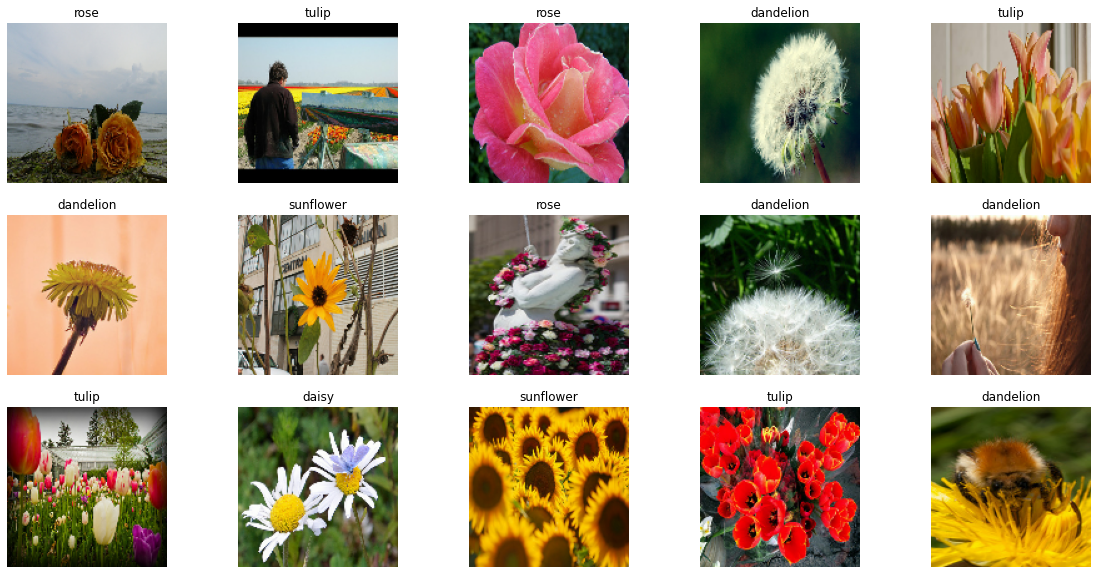

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])
        plt.axis("off")
plt.show()



In [21]:
input_shape = (128, 128, 3)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(len(classes), activation="softmax"),
    ]
)

model.build(input_shape)
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 256)               12583168  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 12,650,245
Trainable params: 12,650,245
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(train_ds, epochs=15, batch_size=5000, verbose=1, validation_data=val_ds)

Epoch 1/15
65/65 [==============================] - 12s 162ms/step - loss: 1742.9690 - accuracy: 0.2641 - val_loss: 487.9178 - val_accuracy: 0.3586
Epoch 2/15
65/65 [==============================] - 11s 161ms/step - loss: 402.5902 - accuracy: 0.3583 - val_loss: 279.1985 - val_accuracy: 0.3805
Epoch 3/15
65/65 [==============================] - 11s 161ms/step - loss: 166.9561 - accuracy: 0.4369 - val_loss: 250.2026 - val_accuracy: 0.3965
Epoch 4/15
65/65 [==============================] - 11s 159ms/step - loss: 131.5058 - accuracy: 0.4471 - val_loss: 86.2837 - val_accuracy: 0.4038
Epoch 5/15
65/65 [==============================] - 11s 159ms/step - loss: 72.1340 - accuracy: 0.4854 - val_loss: 152.3691 - val_accuracy: 0.3105
Epoch 6/15
65/65 [==============================] - 11s 158ms/step - loss: 56.2086 - accuracy: 0.4379 - val_loss: 37.2919 - val_accuracy: 0.4431
Epoch 7/15
65/65 [==============================] - 10s 155ms/step - loss: 19.8911 - accuracy: 0.5413 - val_loss: 23.9240

In [24]:
model.predict(val_ds)

array([[5.8982386e-03, 9.9410170e-01, 4.2896289e-08, 0.0000000e+00,
        3.8885156e-11],
       [3.8033879e-06, 1.3513536e-12, 3.0191771e-07, 0.0000000e+00,
        9.9999595e-01],
       [1.4324945e-15, 2.3111337e-23, 9.9953508e-01, 0.0000000e+00,
        4.6496638e-04],
       ...,
       [1.3395262e-06, 9.9999869e-01, 3.3287862e-17, 2.4450760e-22,
        2.4112221e-14],
       [2.4944066e-38, 0.0000000e+00, 5.7603087e-09, 0.0000000e+00,
        1.0000000e+00],
       [2.9720613e-16, 4.1982071e-31, 3.9074165e-16, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

xepochs = [n for n in range(len(history.history['accuracy']))]

fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy over time", "Loss over time"))

for metric in ['accuracy', 'val_accuracy']:
    fig.add_trace(go.Scatter(x=xepochs, y=history.history[metric], mode='lines+markers', name=metric), row=1, col=1)

for metric in ['loss', 'val_loss']:
    fig.add_trace(go.Scatter(x=xepochs, y=history.history[metric], mode='lines+markers', name=metric), row=1, col=2)

fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_xaxes(title_text="Epoch", row=1, col=2)

fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.show()

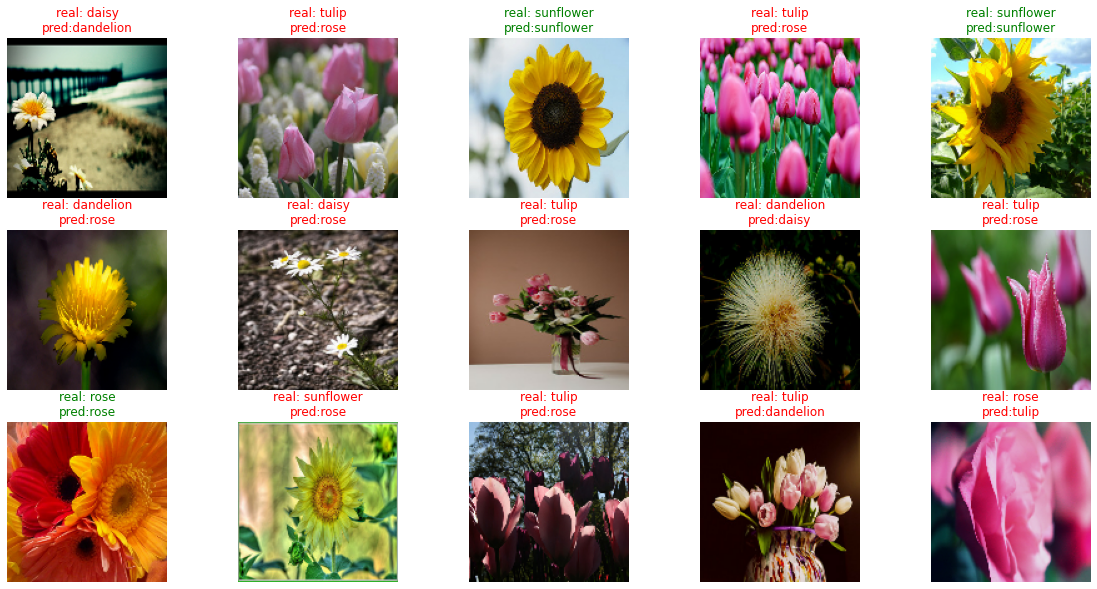

In [26]:
plt.figure(figsize=(20, 10))
for images, labels in val_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        
        img_array = images[i].numpy().astype("uint8")
        prediction = model.predict(np.array([img_array]))
        prediction_name = classes[np.argmax(prediction)]
        real_name = classes[np.argmax(labels[i])]
        
        plt.imshow(img_array)
        if prediction_name == real_name:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'g'})
        else:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'r'})
        
        plt.axis("off")